In [1]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('C:/Users/deepa/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



C:/Users/deepa/Downloads/archive\tumor_model_final.keras
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0000.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0001.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0002.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0003.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0004.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0005.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0006.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0007.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0008.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-glTr_0009.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-gl_0010.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-gl_0011.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-gl_0012.jpg
C:/Users/deepa/Downloads/archive\Testing\glioma\Te-gl_0013.jpg
C:/Users/deepa/Downloads/archive\Testing\

In [2]:
import os
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import itertools

LOADING OF THE DATA

In [3]:

X_train = []
Y_train = []
image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']

PREPROCESSING OF THE TRAINING AND TESTING DATA

In [4]:
for i in labels:
    folderPath = os.path.join("C:/Users/deepa/Downloads/archive/Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [5]:
for i in labels:
    folderPath = os.path.join('C:/Users/deepa/Downloads/archive/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [6]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

SPLIT DATA INTO TRAINING AND TESTING SETS

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)


CONVERT LABELS TO CATEGORICALS

In [9]:
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)


DEFINE THE MODEL AND ADD THE LAYERS

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

MODEL LAYERS SUMMARY

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

COMPILE THE MODEL

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

TRAINING OF THE MODEL

In [14]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
178/178 [==============================] - 578s 3s/step - loss: 1.3389 - accuracy: 0.3063 - val_loss: 1.2189 - val_accuracy: 0.4525
Epoch 2/20
105/178 [================>.............] - ETA: 4:10 - loss: 1.0085 - accuracy: 0.5545

KeyboardInterrupt: 

PLOTING of TRAINING  and VALIDATION  LOSS

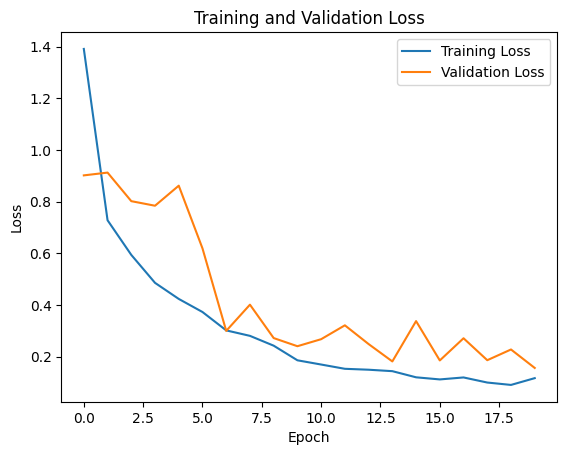

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

PLOTING of TRAINING  and VALIDATION  ACCURACY

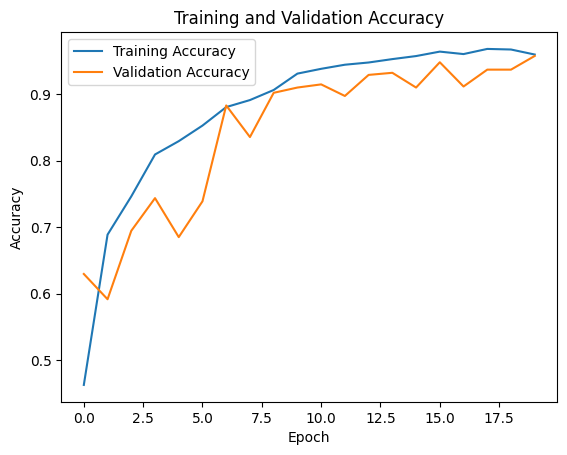

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

EVALUATION of the VALIDATION ACCURACY

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))

22/22 [==============================] - 17s 751ms/step - loss: 0.1963 - accuracy: 0.9360
Validation Accuracy: 93.60%


PREDICTION

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

22/22 [==============================] - 16s 706ms/step


EVALUATION OF THE ACCURACY

In [ ]:
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 93.59886201991465


PLOTING of Confusion_matrix

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

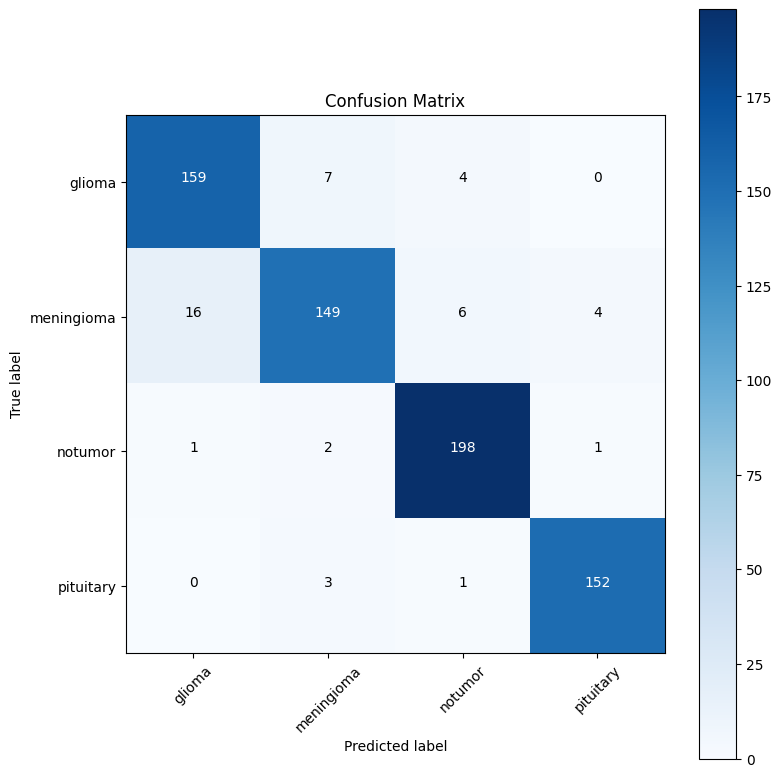

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Predict input image
img = cv2.imread('C:/Users/deepa/Downloads/archive/Testing\glioma\Te-gl_0064.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)


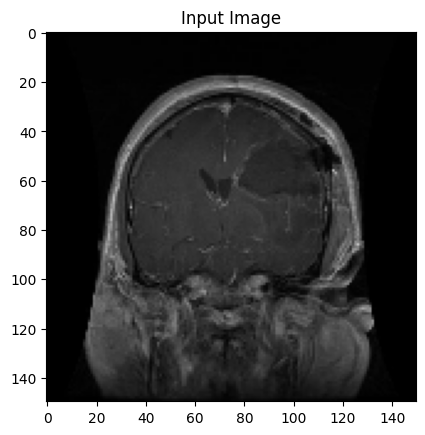

In [ ]:
# Display input image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

 Predict class of input image

In [ ]:

predicted_class = model.predict(img_array)[0]
predicted_label = labels[np.argmax(predicted_class)]
accuracy = np.max(model.predict(img_array)) * 100

1/1 [==============================] - 0s 53ms/step


In [ ]:
print(f"The predicted class of the input image is: {predicted_label}")
print(f"The accuracy of prediction is: {accuracy:.2f}%")

The predicted class of the input image is: glioma
The accuracy of prediction is: 100.00%


In [ ]:
model.save("tumor_model_final.keras")